Text(0.5, 1.0, 'LBP histogram')

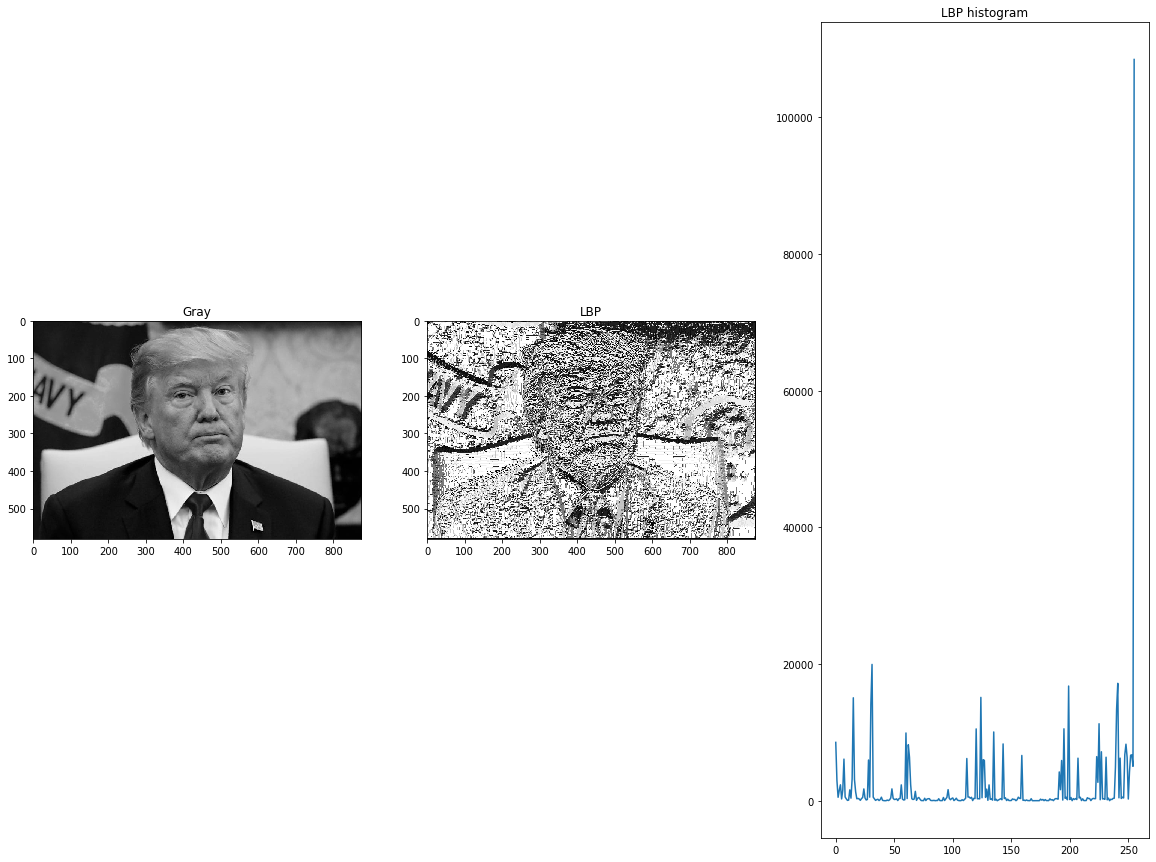

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def olbp(src):
    dst = np.zeros(src.shape,dtype=src.dtype)
    for i in range(1,src.shape[0]-1):
        for j in range(1,src.shape[1]-1):
            pass
            center = src[i][j]
            code = 0;
            code |= (src[i-1][j-1] >= center) << 7;
            code |= (src[i-1][j  ] >= center) << 6;
            code |= (src[i-1][j+1] >= center) << 5;
            code |= (src[i  ][j+1] >= center) << 4;
            code |= (src[i+1][j+1] >= center) << 3;
            code |= (src[i+1][j  ] >= center) << 2;
            code |= (src[i+1][j-1] >= center) << 1;
            code |= (src[i  ][j-1] >= center) << 0;

            dst[i-1][j-1]= code;
    return dst


tlp = cv2.imread('tlp.jpg')

gray = cv2.cvtColor(tlp,cv2.COLOR_RGB2GRAY)

x = olbp(gray)

hist = np.zeros(256)
rows = tlp.shape[0]
cols = tlp.shape[1]
for i in range(rows):
    for j in range(cols):
        tmp = x[i][j] # 取每个像素的值
        hist[tmp] = hist[tmp] + 1 # 叠加

plt.figure(figsize=(20, 15))
plt.subplot(1,3,1)
plt.title('Gray')
plt.imshow(gray, cmap='gray')
plt.subplot(1,3,2)
plt.title('LBP')
plt.imshow(x, cmap='gray')
plt.subplot(1,3,3)
plt.plot(hist)
plt.title('LBP histogram')

